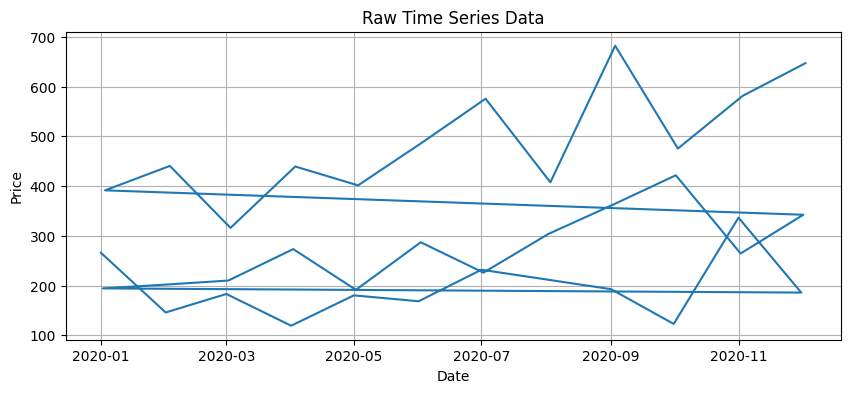

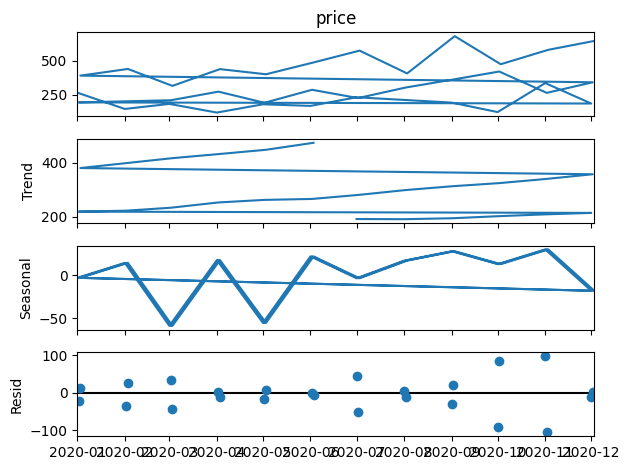

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Step 1: Load the dataset
file_path = 'Dataset.csv'
data = pd.read_csv(file_path)

# Step 2: Fix the month column by adding a year
data['month'] = data['month'] + '-2020'  # Adding dummy year

# Step 3: Convert to datetime
data['month'] = pd.to_datetime(data['month'], format='%d-%b-%Y')

# Step 4: Set date as index
data.set_index('month', inplace=True)

# Step 5: Handle missing values
data['price'] = data['price'].interpolate()  # You can also use .fillna(method='ffill')

# Step 6: Plot raw data
plt.figure(figsize=(10, 4))
plt.plot(data['price'])
plt.title('Raw Time Series Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# Step 7: Decompose the time series
result = seasonal_decompose(data['price'], model='additive', period=12)

# Step 8: Plot decomposition
result.plot()
plt.tight_layout()
plt.show()
